#### Narcotic overdose deaths heatmaps - year 2014 to 2020

In [1]:
# packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# import xlsx file to a pandas dataframe
overdose_data = pd.read_excel('./data/HepVu_County_Opioid_Indicators_05DEC22.xlsx')

In [3]:
# convert GEOID to string
overdose_data['GEO ID'] = overdose_data['GEO ID'].astype(str)

In [4]:
# in df GEOID column id if any GEOID is less than 6 characters insert 0 at the beginning and make it 6 characters
overdose_data['GEO ID'] = overdose_data['GEO ID'].apply(lambda x: x.zfill(5))

In [5]:
# load geospatial data
counties_2020 = gpd.read_file('./data/maps/tl_2020_us_county/tl_2020_us_county.shp')
counties_2023 = gpd.read_file('./data/maps/tl_2023_us_county/tl_2023_us_county.shp')

In [6]:
# in counties_2023, and counties_2020 df GEOID column id if any GEOID is less than 6 characters insert 0 at the beginning and make it 6 characters
counties_2023['GEOID'] = counties_2023['GEOID'].apply(lambda x: x.zfill(5))
counties_2020['GEOID'] = counties_2020['GEOID'].apply(lambda x: x.zfill(5))

In [7]:
# match the GEOID column in the df with the GEOID column in the geospatial data and get the similar row count
overdose_data['GEO ID'].isin(counties_2020['GEOID']).value_counts()

GEO ID
True    3221
Name: count, dtype: int64

In [8]:
overdose_data['GEO ID'].isin(counties_2023['GEOID']).value_counts()

GEO ID
True     3213
False       8
Name: count, dtype: int64

In [9]:
# get the unmatched GEOID rows
overdose_data[~overdose_data['GEO ID'].isin(counties_2023['GEOID'])]

GEO ID State Abbreviation      County Name  Opioid Prescription Rate 2020  \
309  09001                 CT  Fairfield Count                           33.7   
310  09003                 CT  Hartford County                           39.0   
311  09005                 CT  Litchfield Coun                           22.8   
312  09007                 CT  Middlesex Count                           26.2   
313  09009                 CT  New Haven Count                           48.9   
314  09011                 CT  New London Coun                           35.4   
315  09013                 CT   Tolland County                           17.8   
316  09015                 CT   Windham County                           28.4   

     Narcotic Overdose Mortality Rate 2014  \
309                                   11.1   
310                                   17.8   
311                                   26.9   
312                                   20.3   
313                                   17.6   
314                                   21.1   
315                                   16.7   
316                                   25.5   

     Narcotic Overdose Mortality Rate 2015  \
309                                   14.7   
310                                   23.0   
311                                   28.4   
312                                   23.5   
313                                   24.7   
314                                   27.3   
315                                   16.1   
316                                   27.5   

     Narcotic Overdose Mortality Rate 2016  \
309                                   18.6   
310                                   29.7   
311                                   24.1   
312                                   28.0   
313                                   29.5   
314                                   34.7   
315                                   22.6   
316                                   29.9   

     Narcotic Overdose Mortality Rate 2017  \
309                                   18.1   
310                                   34.4   
311                                   30.1   
312                                   28.6   
313                                   34.2   
314                                   32.9   
315                                   27.4   
316                                   35.5   

     Narcotic Overdose Mortality Rate 2018  \
309                                   19.2   
310                                   32.8   
311                                   39.6   
312                                   35.9   
313                                   30.5   
314                                   35.0   
315                                   23.3   
316                                   32.4   

     Narcotic Overdose Mortality Rate 2019  \
309                                   20.1   
310                                   37.3   
311                                   38.6   
312                                   30.0   
313                                   39.7   
314                                   41.1   
315                                   22.2   
316                                   42.2   

     Narcotic Overdose Mortality Rate 2020  
309                                   24.6  
310                                   42.2  
311                                   42.9  
312                                   36.3  
313                                   46.4  
314                                   41.6  
315                                   31.8  
316                                   41.0

In [10]:
# making overdose data a geo data frame

In [11]:
# Add a column to the overdose_data df that contains geometry data. This should be filled with the geometry data from the counties_2020 df by matching the GEOID column in the overdose_data df with the GEOID column in the counties_2020 df.
overdose_data = overdose_data.merge(counties_2020[['GEOID', 'geometry']], left_on='GEO ID', right_on='GEOID', how='left')

In [12]:
# make this df a geospatial df
overdose_data = gpd.GeoDataFrame(overdose_data, geometry='geometry')

#### Overdose data heatmaps - Wyoming

In [13]:
overdose_data_wy = overdose_data[overdose_data['State Abbreviation'] == 'WY']

##### Wyoming complete heatmap

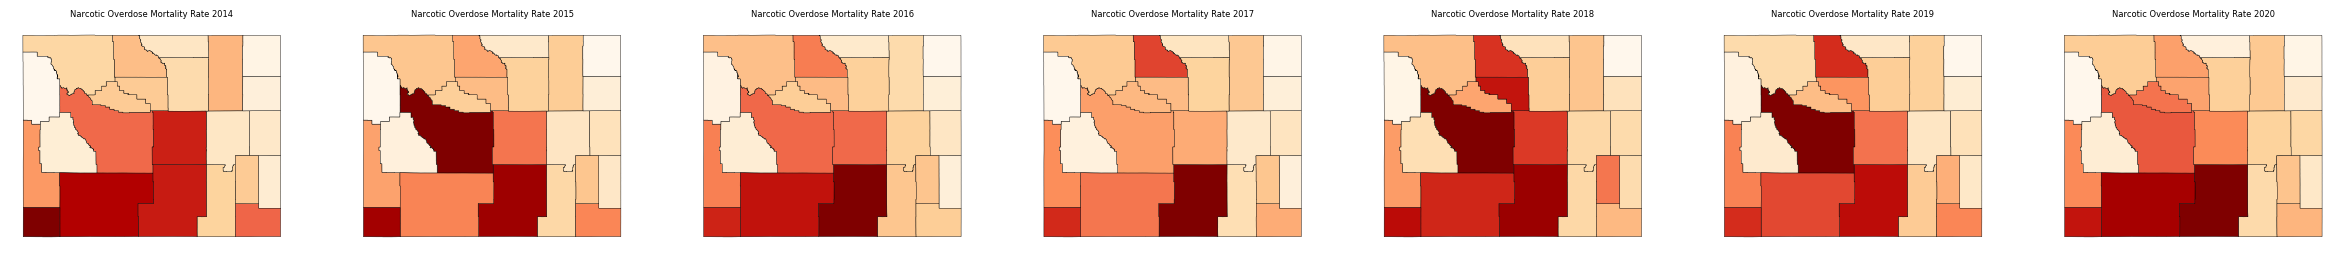

In [14]:
# plot above plot for Narcotic Overdose Mortality Rate 2014, Narcotic Overdose Mortality Rate 2015, Narcotic Overdose Mortality Rate 2016, Narcotic Overdose Mortality Rate 2017, Narcotic Overdose Mortality Rate 2018, Narcotic Overdose Mortality Rate 2019, and Narcotic Overdose Mortality Rate 2020
fig, ax = plt.subplots(1, 7, figsize=(30, 30))

for i, year in enumerate(range(2014, 2021)):
    overdose_data_wy.plot(column=f'Narcotic Overdose Mortality Rate {year}', legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=6)
    ax.flatten()[i].axis('off')

plt.show()

##### Wyoming heatmap - Counties greater than 50 th percentile

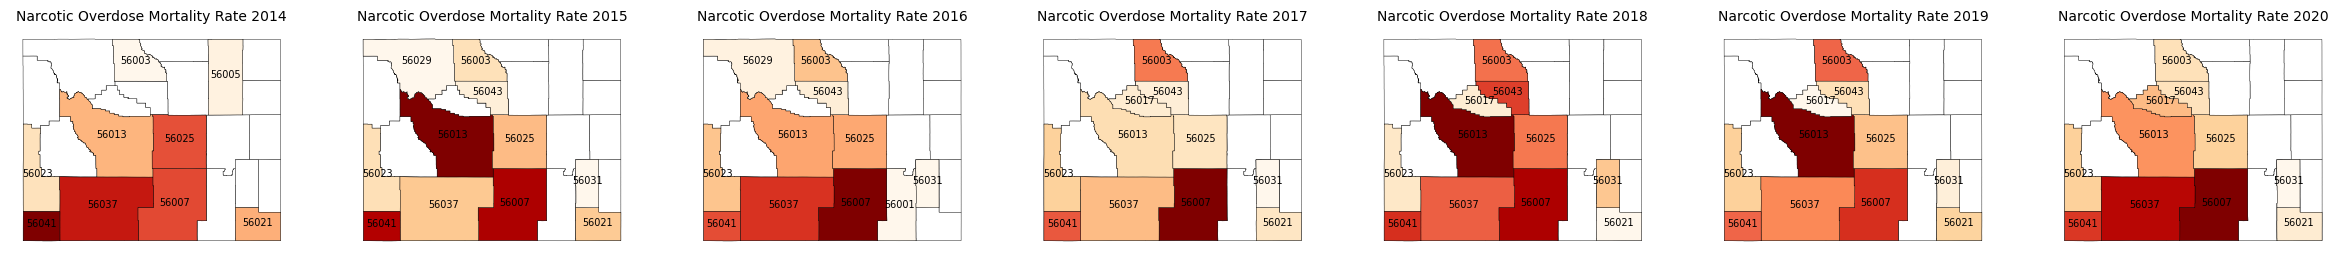

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 7, figsize=(30, 30))


for i, year in enumerate(range(2014, 2021)):
    overdose_data_wy.plot(ax=ax[i], edgecolor='black', linewidth=0.3, color="white")

    temp_df = overdose_data_wy[overdose_data_wy[f'Narcotic Overdose Mortality Rate {year}'] > overdose_data_wy[f'Narcotic Overdose Mortality Rate {year}'].quantile(0.50)]

    temp_df.plot(ax=ax[i], column=f"Narcotic Overdose Mortality Rate {year}", legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3)
    ax[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=10)
    ax[i].axis('off')

    for idx, row in temp_df.iterrows():
        centroid = row.geometry.centroid
        county_name = row['GEOID']
        ax[i].annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=7)

plt.show()


##### Wyoming heatmap - Counties greater than 75 th percentile

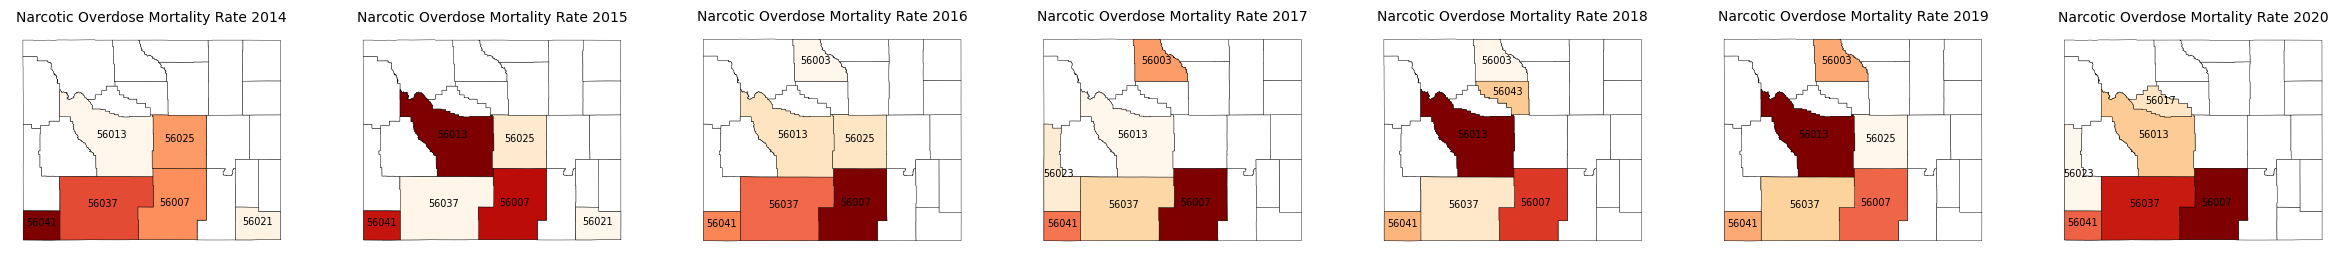

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 7, figsize=(30, 30))


for i, year in enumerate(range(2014, 2021)):
    overdose_data_wy.plot(ax=ax[i], edgecolor='black', linewidth=0.3, color="white")

    temp_df = overdose_data_wy[overdose_data_wy[f'Narcotic Overdose Mortality Rate {year}'] > overdose_data_wy[f'Narcotic Overdose Mortality Rate {year}'].quantile(0.75)]

    temp_df.plot(ax=ax[i], column=f"Narcotic Overdose Mortality Rate {year}", legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3)
    ax[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=10)
    ax[i].axis('off')

    for idx, row in temp_df.iterrows():
        centroid = row.geometry.centroid
        county_name = row['GEOID']
        ax[i].annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=7)

plt.show()


#### Overdose data heatmaps - Tennessee

In [17]:
overdose_data_tn = overdose_data[overdose_data['State Abbreviation'] == 'TN']

##### TN complete heatmap

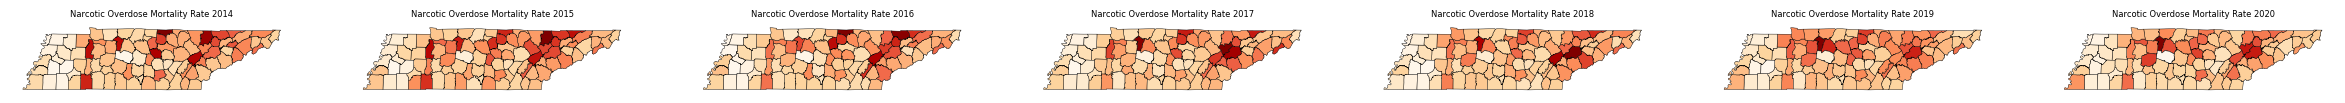

In [18]:
# plot above plot for Narcotic Overdose Mortality Rate 2014, Narcotic Overdose Mortality Rate 2015, Narcotic Overdose Mortality Rate 2016, Narcotic Overdose Mortality Rate 2017, Narcotic Overdose Mortality Rate 2018, Narcotic Overdose Mortality Rate 2019, and Narcotic Overdose Mortality Rate 2020
fig, ax = plt.subplots(1, 7, figsize=(30, 30))

for i, year in enumerate(range(2014, 2021)):
    overdose_data_tn.plot(column=f'Narcotic Overdose Mortality Rate {year}', legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=6)
    ax.flatten()[i].axis('off')

plt.show()

##### TN heatmap - Counties greater than 50 th percentile

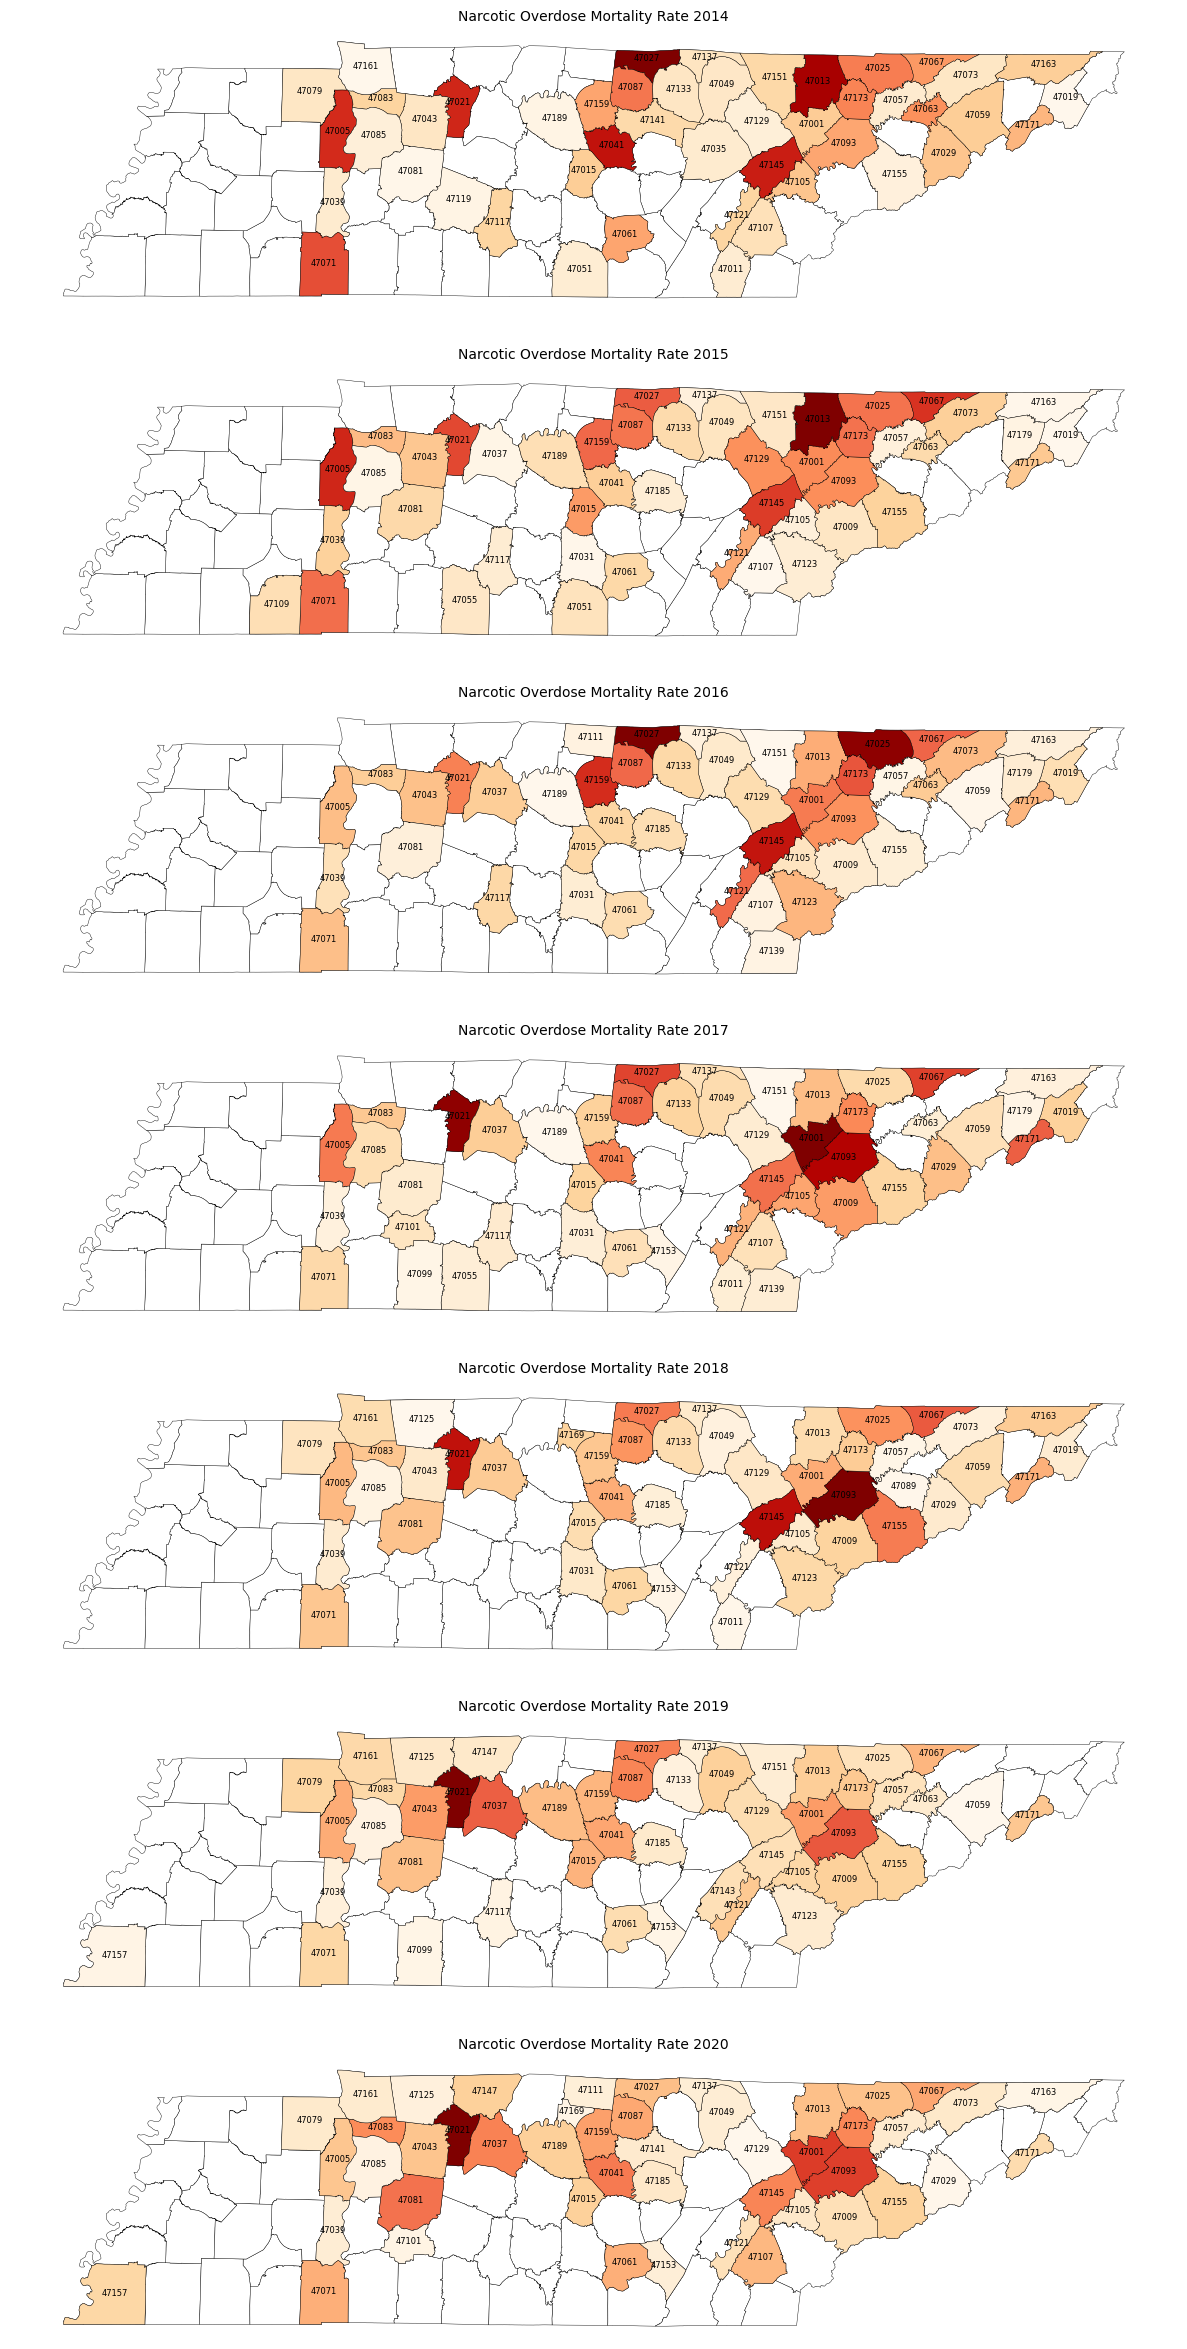

In [19]:
fig, ax = plt.subplots(7, 1, figsize=(30, 30))


for i, year in enumerate(range(2014, 2021)):
    overdose_data_tn.plot(ax=ax[i], edgecolor='black', linewidth=0.3, color="white")

    temp_df = overdose_data_tn[overdose_data_tn[f'Narcotic Overdose Mortality Rate {year}'] > overdose_data_tn[f'Narcotic Overdose Mortality Rate {year}'].quantile(0.50)]

    temp_df.plot(ax=ax[i], column=f"Narcotic Overdose Mortality Rate {year}", legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3)
    ax[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=10)
    ax[i].axis('off')

    for idx, row in temp_df.iterrows():
        centroid = row.geometry.centroid
        county_name = row['GEOID']
        ax[i].annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=6)

plt.show()

##### TN heatmap - Counties greater than 75 th percentile

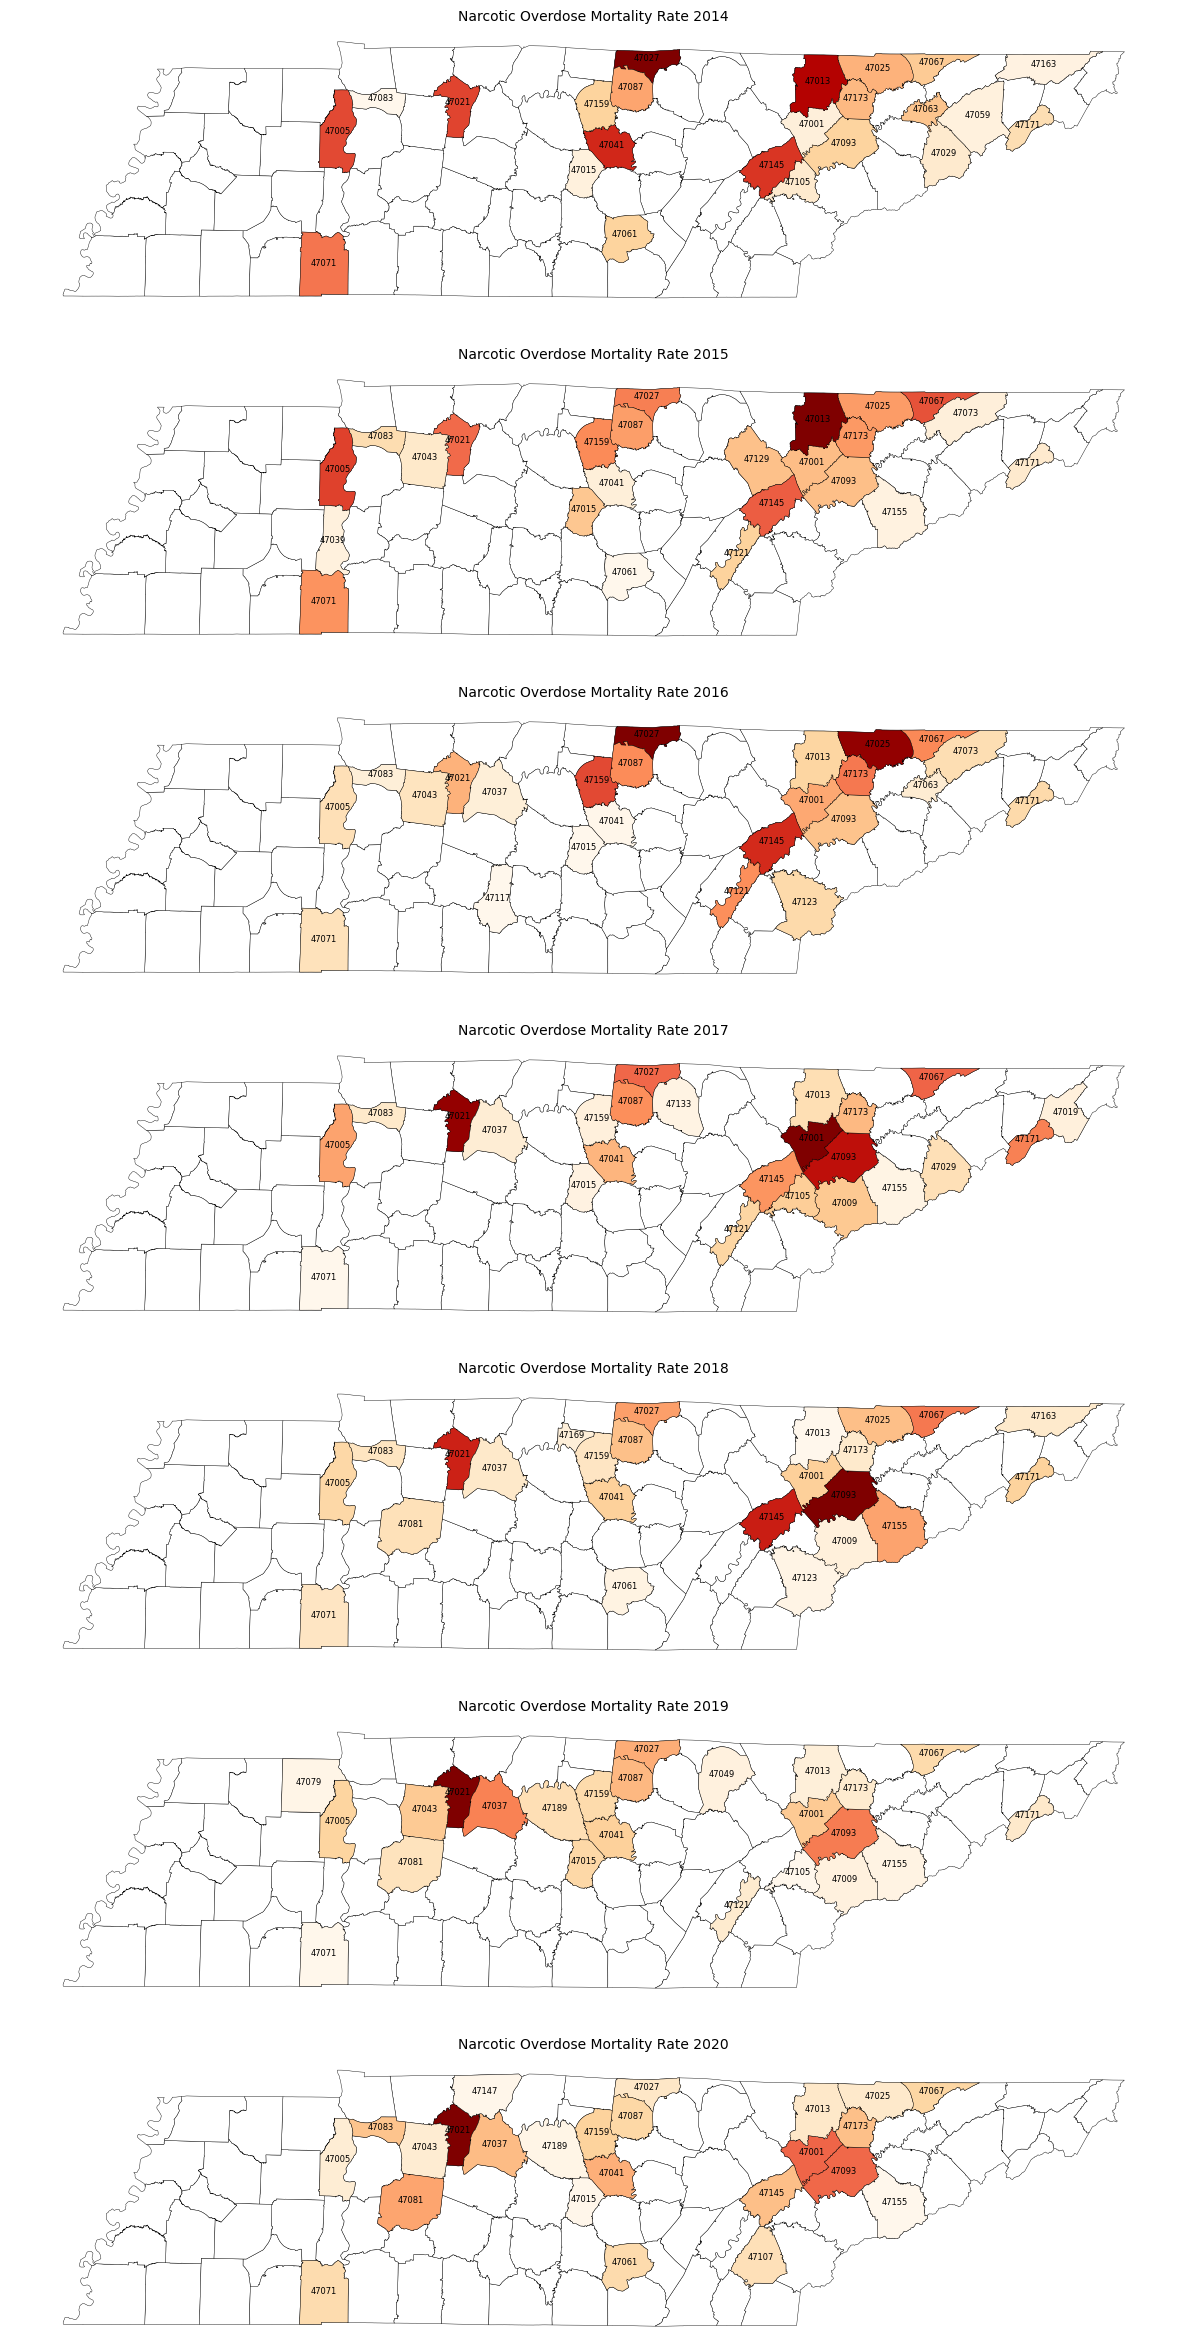

In [20]:
fig, ax = plt.subplots(7, 1, figsize=(30, 30))


for i, year in enumerate(range(2014, 2021)):
    overdose_data_tn.plot(ax=ax[i], edgecolor='black', linewidth=0.3, color="white")

    temp_df = overdose_data_tn[overdose_data_tn[f'Narcotic Overdose Mortality Rate {year}'] > overdose_data_tn[f'Narcotic Overdose Mortality Rate {year}'].quantile(0.75)]

    temp_df.plot(ax=ax[i], column=f"Narcotic Overdose Mortality Rate {year}", legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3)
    ax[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=10)
    ax[i].axis('off')

    for idx, row in temp_df.iterrows():
        centroid = row.geometry.centroid
        county_name = row['GEOID']
        ax[i].annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=6)


##### Percentile map with defined percentiles

In [21]:
overdose_data_tn.head()

GEO ID State Abbreviation      County Name  \
2429  47001                 TN  Anderson County   
2430  47003                 TN   Bedford County   
2431  47005                 TN    Benton County   
2432  47007                 TN   Bledsoe County   
2433  47009                 TN    Blount County   

      Opioid Prescription Rate 2020  Narcotic Overdose Mortality Rate 2014  \
2429                           51.9                                   26.6   
2430                           31.2                                   16.8   
2431                           36.5                                   37.5   
2432                           57.5                                   15.0   
2433                           41.2                                   19.4   

      Narcotic Overdose Mortality Rate 2015  \
2429                                   33.9   
2430                                   18.5   
2431                                   40.0   
2432                                   17.1   
2433                                   25.6   

      Narcotic Overdose Mortality Rate 2016  \
2429                                   39.9   
2430                                   17.0   
2431                                   34.9   
2432                                   20.3   
2433                                   28.2   

      Narcotic Overdose Mortality Rate 2017  \
2429                                   55.5   
2430                                   17.7   
2431                                   42.4   
2432                                   21.5   
2433                                   39.3   

      Narcotic Overdose Mortality Rate 2018  \
2429                                   38.3   
2430                                   21.8   
2431                                   37.2   
2432                                   23.1   
2433                                   33.4   

      Narcotic Overdose Mortality Rate 2019  \
2429                                   41.1   
2430                                   24.6   
2431                                   39.9   
2432                                   21.2   
2433                                   35.6   

      Narcotic Overdose Mortality Rate 2020  GEOID  \
2429                                   71.2  47001   
2430                                   30.2  47003   
2431                                   52.0  47005   
2432                                   22.4  47007   
2433                                   45.1  47009   

                                               geometry  
2429  POLYGON ((-84.32518 36.00503, -84.32528 36.005...  
2430  POLYGON ((-86.63521 35.57741, -86.63569 35.577...  
2431  POLYGON ((-88.13690 36.20954, -88.13694 36.209...  
2432  POLYGON ((-85.22650 35.76642, -85.22643 35.766...  
2433  POLYGON ((-84.14252 35.79695, -84.14158 35.797...

In [22]:
# for Narcotic Overdose Mortality Rate 2020 create a new column with percentile categoty for each row in the df, the percentile categories are as follows: <1%,1%-10%, 10%-50%, 50%-90%, 90%-99%, >99%
overdose_data_tn['Narcotic Overdose Mortality Rate 2020 percentile'] = pd.qcut(overdose_data_tn['Narcotic Overdose Mortality Rate 2020'], q=[0, 0.01, 0.1, 0.5, 0.9, 0.99, 1], labels=['<1%', '1%-10%', '10%-50%', '50%-90%', '90%-99%', '>99%'])

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [25]:
overdose_data_tn.head(3)

GEO ID State Abbreviation      County Name  \
2429  47001                 TN  Anderson County   
2430  47003                 TN   Bedford County   
2431  47005                 TN    Benton County   

      Opioid Prescription Rate 2020  Narcotic Overdose Mortality Rate 2014  \
2429                           51.9                                   26.6   
2430                           31.2                                   16.8   
2431                           36.5                                   37.5   

      Narcotic Overdose Mortality Rate 2015  \
2429                                   33.9   
2430                                   18.5   
2431                                   40.0   

      Narcotic Overdose Mortality Rate 2016  \
2429                                   39.9   
2430                                   17.0   
2431                                   34.9   

      Narcotic Overdose Mortality Rate 2017  \
2429                                   55.5   
2430                                   17.7   
2431                                   42.4   

      Narcotic Overdose Mortality Rate 2018  \
2429                                   38.3   
2430                                   21.8   
2431                                   37.2   

      Narcotic Overdose Mortality Rate 2019  \
2429                                   41.1   
2430                                   24.6   
2431                                   39.9   

      Narcotic Overdose Mortality Rate 2020  GEOID  \
2429                                   71.2  47001   
2430                                   30.2  47003   
2431                                   52.0  47005   

                                               geometry  \
2429  POLYGON ((-84.32518 36.00503, -84.32528 36.005...   
2430  POLYGON ((-86.63521 35.57741, -86.63569 35.577...   
2431  POLYGON ((-88.13690 36.20954, -88.13694 36.209...   

     Narcotic Overdose Mortality Rate 2020 percentile  
2429                                          90%-99%  
2430                                          10%-50%  
2431                                          50%-90%

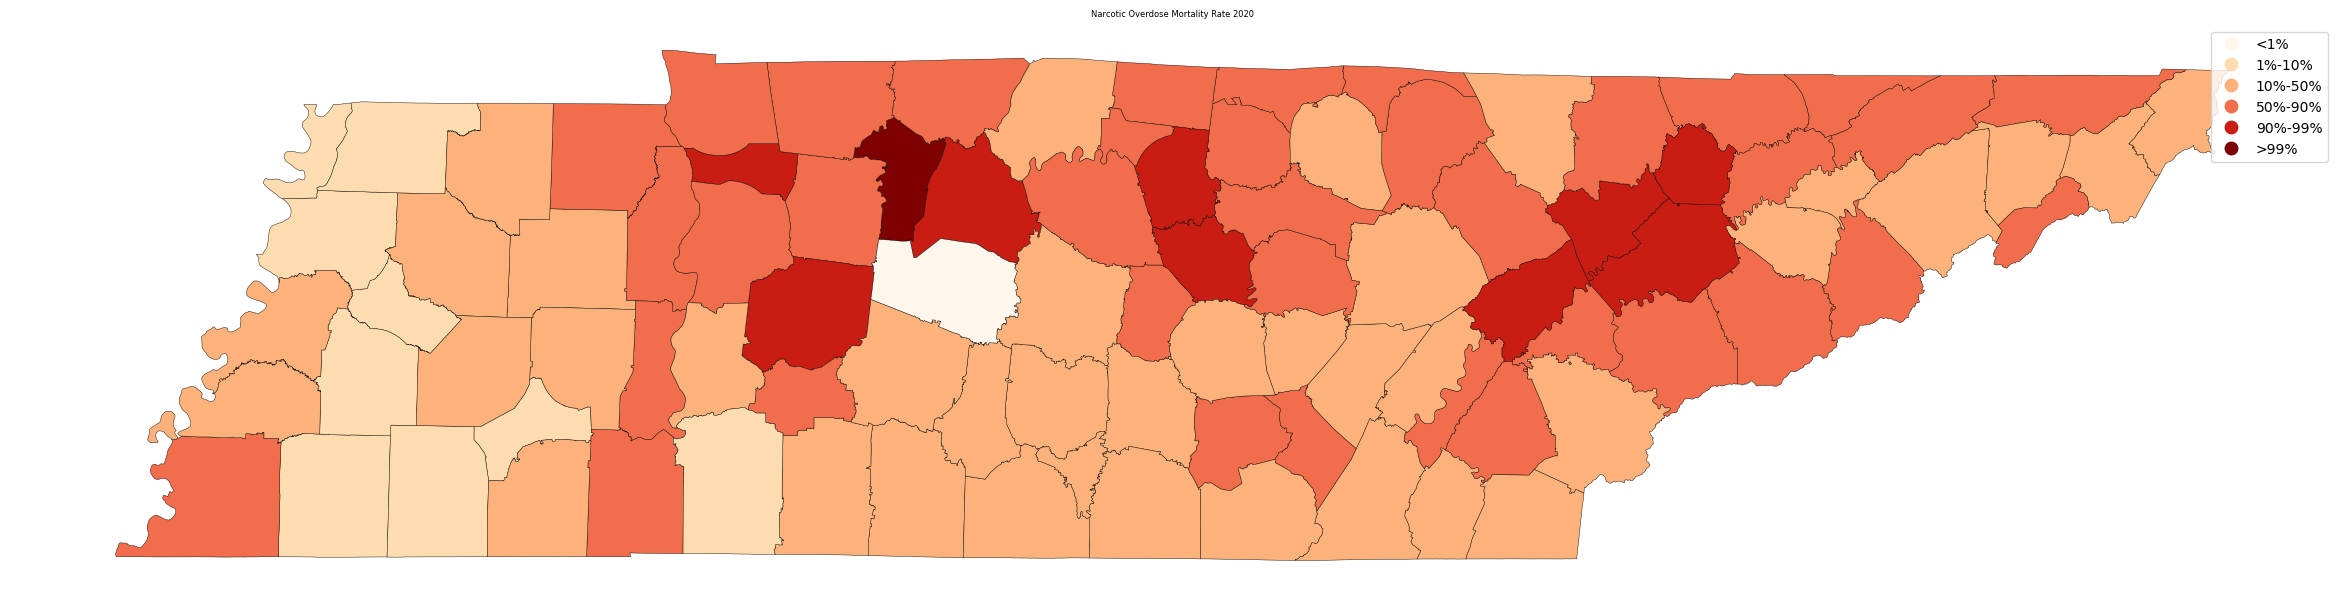

In [24]:
# plot the map for Narcotic Overdose Mortality Rate 2020 with the percentile category

fig, ax = plt.subplots(1, 1, figsize=(30, 30))
overdose_data_tn.plot(column='Narcotic Overdose Mortality Rate 2020 percentile', legend=True, cmap='OrRd', edgecolor='black', linewidth=0.3, ax=ax)
ax.set_title('Narcotic Overdose Mortality Rate 2020', fontsize=6)
ax.axis('off')
plt.show()

In [34]:
for i, year in enumerate([2014,2015,2017,2018,2019,2020]):

    # create a temp df with percentile categories for each year
    overdose_data_tn[f'Narcotic Overdose Mortality Rate {year} percentile'] = pd.qcut(overdose_data_tn[f'Narcotic Overdose Mortality Rate {year}'], q=[0, 0.01, 0.1, 0.5, 0.9, 0.99, 1], labels=['<1%', '1%-10%', '10%-50%', '50%-90%', '90%-99%', '>99%'])


/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

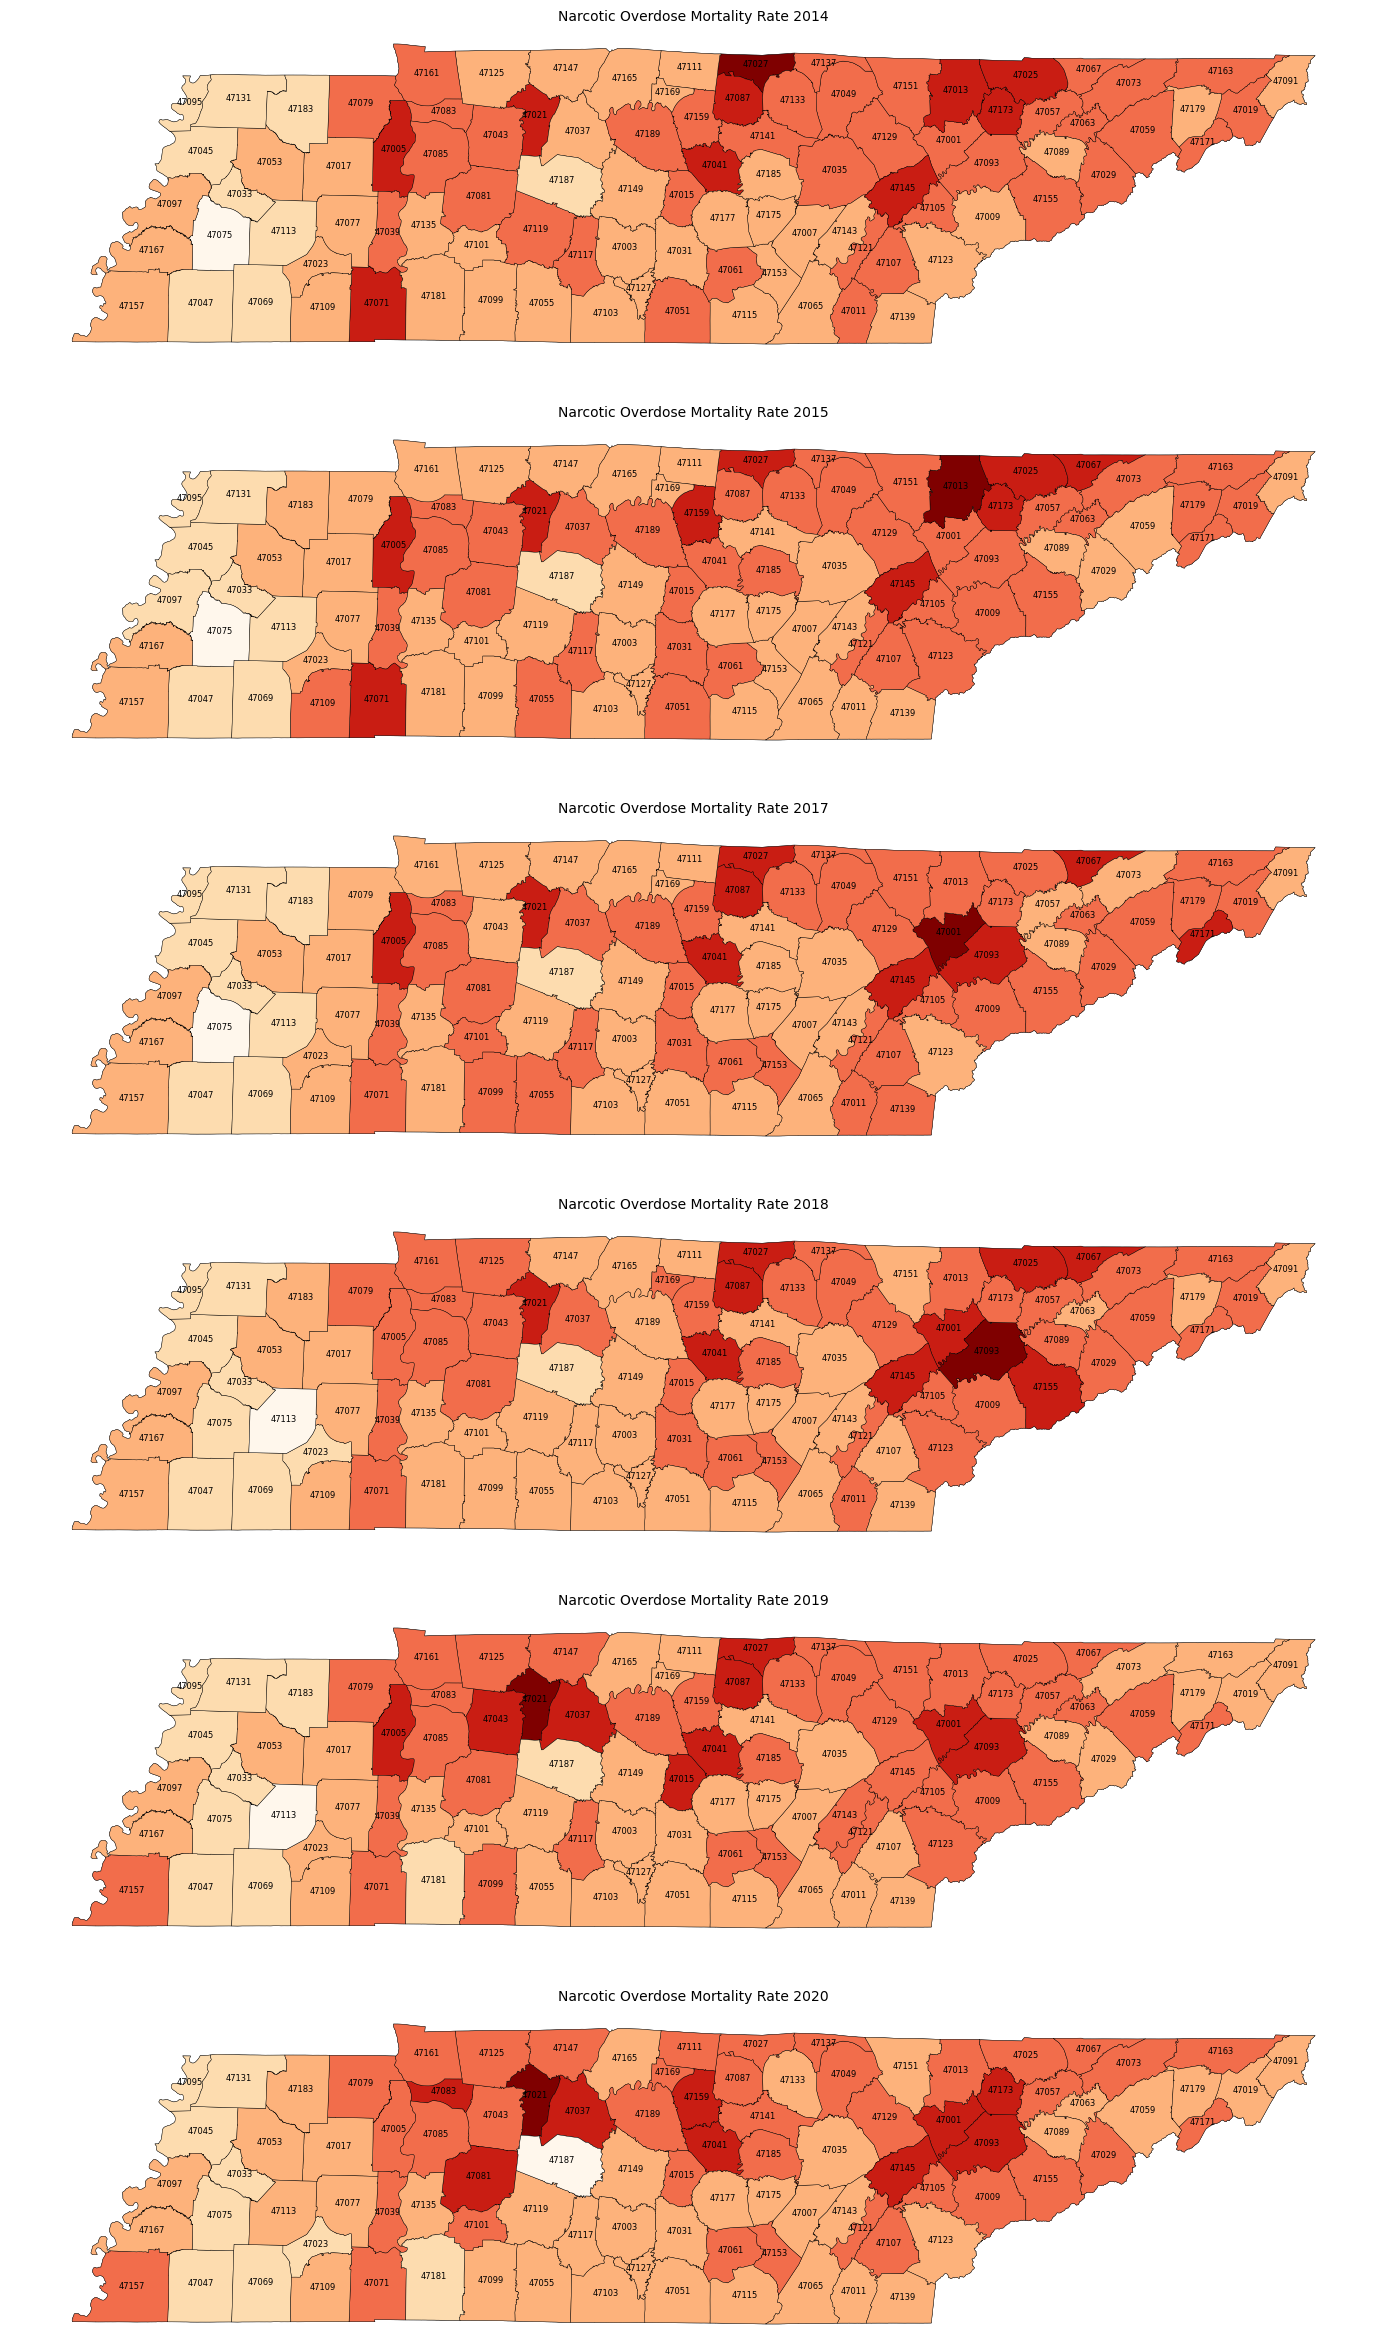

In [35]:
fig, ax = plt.subplots(6, 1, figsize=(30, 30))


for i, year in enumerate([2014,2015,2017,2018,2019,2020]):
    overdose_data_tn.plot(ax=ax[i], edgecolor='black', linewidth=0.3, color="white")

    overdose_data_tn.plot(ax=ax[i], column=f"Narcotic Overdose Mortality Rate {year} percentile", legend=False, cmap='OrRd', edgecolor='black', linewidth=0.3)
    ax[i].set_title(f'Narcotic Overdose Mortality Rate {year}', fontsize=10)
    ax[i].axis('off')

    for idx, row in overdose_data_tn.iterrows():
        centroid = row.geometry.centroid
        county_name = row['GEOID']
        ax[i].annotate(text=county_name, xy=(centroid.x, centroid.y), ha='center', fontsize=6)
    